<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Analitika_bolshih_dannyh/Mashinnoe_obuchenie_i_Data_Science/Kondratev_ABD_40_Homework_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Преподаватель:** Алексей Кузьмин

## Домашнее задание:

* взять датасет homework.csv ([см. доп. файлы к этому ДЗ](https://github.com/stefkong1982/netology.ru/blob/Master/Analitika_bol'shih_dannyh/Mashinnoe_obuchenie_i_Data_Science/homework.csv));
* предсказать значение столбца MEDV на основе других признаков;
* решить задачу регрессии, используя алгоритм линейной регрессии;
* оценить качество регрессии при помощи метрики MSE.

Предоставленная вами база данных представляет собой набор данных о недвижимости в Бостоне. Эти данные часто используются в статистических и машинно-обучающих задачах для прогнозирования медианной стоимости дома в Бостоне на основе различных характеристик.

Описание столбцов:

1. ID: Уникальный идентификатор каждого наблюдения.
2. crim: Уровень преступности на душу населения по городу.
3. zn: Доля жилой земли, зонированной под участки площадью более 25 000 кв. футов.
4. indus: Доля акров, не относящихся к розничной торговле, на город.
5. chas: Фиктивная переменная реки Чарльз, равная 1, если участок ограничивает реку, в противном случае 0.
6. nox: Концентрация оксидов азота (частей на 10 миллионов).
7. rm: Среднее количество комнат в доме.
8. age: Доля жилых единиц, построенных до 1940 года.
9. dis: Среднее расстояние до пяти бостонских центров занятости.
10. rad: Индекс доступности радиальных шоссе.
11. tax: Ставка налога на имущество в размере пятнадцати тысяч долларов за 1000 долларов.
12. ptratio: Соотношение учеников и учителей по городам.
13. black: Доля афроамериканцев по городам.
14. lstat: Процент населения с низким социальным статусом.
15. medv: Медианная стоимость домов, занимаемых владельцами, в тысячах долларов.

Эти данные могут быть использованы для анализа факторов, влияющих на цену жилья в Бостоне, и для прогнозирования цен на недвижимость на основе различных характеристик. Они также могут быть использованы для построения моделей машинного обучения и статистического анализа

### Загрузка данных

In [ ]:
import pandas as pd

In [ ]:
# Загружаем данные в переменную df из файла homework.csv

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Analitika_bol'shih_dannyh/Mashinnoe_obuchenie_i_Data_Science/homework.csv")

In [ ]:
df

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


### Корреляция

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

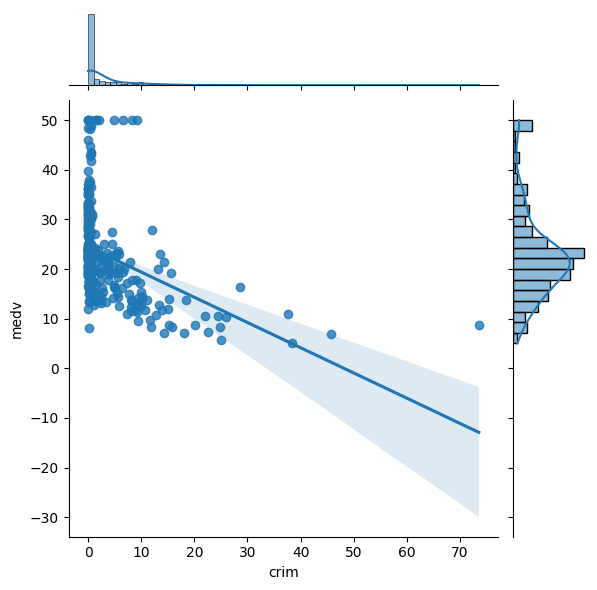

In [ ]:
# Построим scatter график по параметрам crim, medv
sns.jointplot(x='crim', y='medv', data=df, kind='reg')
plt.show()

In [ ]:
# Вычисление и вывод коэффициента корреляции Пирсона по параметрам crim, medv
correlation_pearson = df['crim'].corr(df['medv'])
print(correlation_pearson)

-0.4074543235732591


Коэффициент корреляции для параметров `crim` и `medv` равен `-0.407`. Это указывает на умеренную отрицательную линейную корреляцию между уровнем преступности и медианной стоимостью жилья. Это означает, что более высокий уровень преступности связан с более низкой медианной стоимостью жилья.

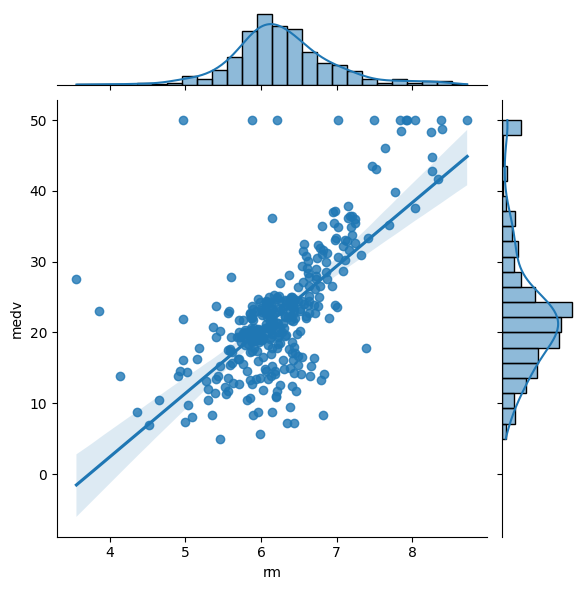

In [ ]:
# Построим scatter график по параметрам rm, medv
sns.jointplot(x='rm', y='medv', data=df, kind='reg')
plt.show()

In [ ]:
# Вычисление и вывод коэффициента корреляции Пирсона по параметрам rm, medv
correlation_pearson_rm_medv = df['rm'].corr(df['medv'])
print(correlation_pearson_rm_medv)

0.6895980892872146


Коэффициент корреляции для параметров `rm` и `medv` равен `0.69`. Это указывает на сильную положительную линейную корреляцию между средним количеством комнат в жилье и медианной стоимостью жилья. Это означает, что более высокое среднее количество комнат связано с более высокой медианной стоимостью жилья.

### Регрессия

In [ ]:
# Сформируем X и y из df, выбрав нужные колонки
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']] # Признаки
y = df['medv']  # Целевая переменная

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Построим scatter plot (диаграмму рассеяния) с линейной линией, предсказывающей значения переменной y.

In [ ]:
# Получение прогнозов на тестовой выборке
y_pred = model.predict(X_test)

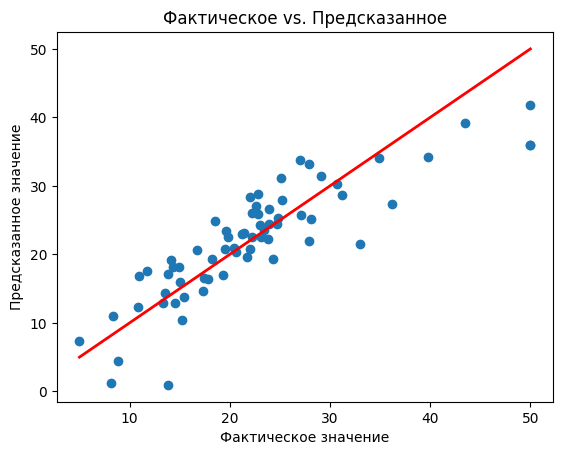

In [ ]:
import numpy as np

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Линия идеального предсказания
plt.xlabel("Фактическое значение")
plt.ylabel("Предсказанное значение")
plt.title("Фактическое vs. Предсказанное")
plt.show()

### Оценим качество регрессии

In [ ]:
# Импорт необходимых библиотек
from sklearn.metrics import mean_squared_error

# Оценка качества на обучающем наборе
mean_squared_error(y_train, model.predict(X_train))

22.584539086001996

In [ ]:
# Оценка качества на тестовом наборе
mean_squared_error(y_test, model.predict(X_test))

23.486735195426004

Из результатов оценки качества модели на обучающем и тестовом наборе следует следующее:

1. Среднеквадратическая ошибка (`MSE`) на обучающем и тестовом наборах составляет `22.58` и `23.49` соответственно. `MSE` представляет собой среднее значение квадрата разности между фактическими и предсказанными значениями. Чем меньше значение `MSE`, тем лучше модель справляется с предсказанием. В данном случае, значение `MSE` на обучающем и тестовом наборах практически сопоставимо, что может указывать на отсутствие переобучения модели.

2. В целом, значения `MSE` говорят о том, что модель имеет некоторую способность предсказывать значение целевой переменной на новых, ранее не встречавшихся данных. Однако значения `MSE` в районе `22-23` все еще довольно высоки, что может указывать на переобученность модели или наличие недостаточно информативных признаков для предсказания целевой переменной.

### Посмотрим остатки

In [ ]:
# Вычисляем разницу между фактическими и предсказанными значениями
diff = y_test - y_pred

# Выводим сводную статистику для разности
diff.describe()

count    67.000000
mean      0.284998
std       4.874437
min      -6.794293
25%      -2.971702
50%      -0.491792
75%       2.227054
max      14.087756
Name: medv, dtype: float64

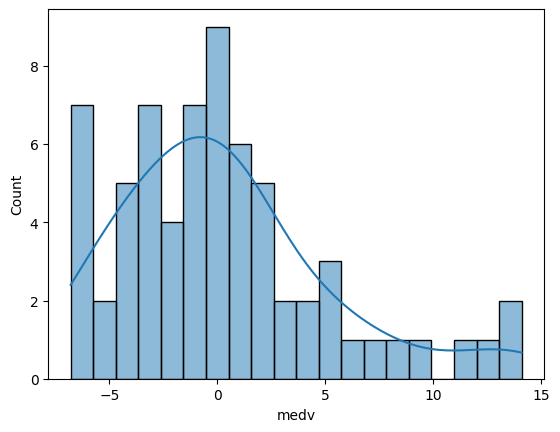

In [ ]:
# Созданем гистограмму остатков с использованием библиотеки seaborn
sns.histplot((y_test-y_pred), kde=True, bins=20)
plt.show()

Из сводной статистики разницы между фактическими и предсказанными значениями (`diff`) мы можем сделать следующие выводы:

1. Среднее значение разности составляет `0.285`. Это означает, что средняя разница между фактическими и предсказанными значениями находится близко к нулю, что указывает на то, что модель в среднем достаточно хорошо предсказывает целевую переменную.

2. Стандартное отклонение равно `4.874`, что указывает на разброс значений разности вокруг среднего значения. Это может указывать на различные уровни точности предсказаний для разных наблюдений.

3. Минимальное значение разности составляет `-6.794`, а максимальное значение `14.088`. Это говорит о том, что некоторые предсказанные значения значительно отличаются от фактических значений.

4. Квартили разности также показывают, что `50%` значений находятся в диапазоне от `-2.972` до `2.227`, что демонстрирует разнообразие разности между предсказанными и фактическими значениями.